COSTUMER ACQUISITION COST PREDICTION

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
data = pd.read_excel("customers.xlsx")

In [20]:
data.shape


(60428, 40)

In [133]:
data_type = data.dtypes

In [134]:
data_type

food_category                object
food_department              object
food_family                  object
store_sales(in millions)    float64
store_cost(in millions)     float64
unit_sales(in millions)       int64
promotion_name               object
sales_country                object
marital_status               object
gender                       object
total_children                int32
education                    object
member_card                  object
occupation                   object
houseowner                   object
avg_cars_at home(approx)      int32
avg. yearly_income           object
num_children_at_home          int32
brand_name                   object
SRP                         float64
gross_weight                float64
net_weight                  float64
recyclable_package            int64
low_fat                       int64
units_per_case                int64
store_type                   object
store_city                   object
store_state                 

In [135]:
data_type.value_counts()

object     17
int64      13
float64     7
int32       3
dtype: int64

In [136]:
for i in data.columns:
    
    print(data.loc[:,i].isnull().values.any())

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [137]:
data.corr()

C:\Users\abhay\AppData\Local\Temp\ipykernel_16248\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,store_profit
store_sales(in millions),1.000000,0.954685,0.503482,0.083313,0.004498,0.032437,0.833478,0.036179,0.032014,0.034293,-0.006134,-0.010630,0.015543,0.010442,0.017886,0.017883,-0.029368,0.019179,0.031459,0.031459,0.030603,-0.004621,-0.002304
store_cost(in millions),0.954685,1.000000,0.480087,0.079058,0.002865,0.027576,0.795880,0.034237,0.030257,0.030213,-0.005976,-0.009792,0.017877,0.012884,0.019245,0.019242,-0.027126,0.019252,0.033206,0.033206,0.030929,-0.004162,-0.263021
unit_sales(in millions),0.503482,0.480087,1.000000,0.163188,0.023667,0.066725,-0.002358,0.001255,0.001137,0.001599,-0.001129,0.000084,0.031464,0.024857,0.030563,0.030557,-0.057633,0.034996,0.057878,0.057878,0.055885,-0.015015,0.003712
total_children,0.083313,0.079058,0.163188,1.000000,0.098110,0.394709,0.000545,-0.000186,0.000142,0.002794,-0.002824,0.002307,0.000555,0.018526,-0.026926,-0.026923,0.002836,-0.000591,-0.013764,-0.013764,-0.003361,-0.003900,0.002498
avg_cars_at home(approx),0.004498,0.002865,0.023667,0.098110,1.000000,0.130841,-0.007921,0.004588,0.004155,0.003725,-0.004312,-0.007265,-0.015815,-0.017694,-0.007470,-0.007466,-0.002702,0.014001,-0.008982,-0.008982,-0.004138,0.011658,0.006825
num_children_at_home,0.032437,0.027576,0.066725,0.394709,0.130841,1.000000,-0.000477,-0.002480,-0.002535,0.001380,-0.001818,0.000118,0.006150,0.025008,-0.024624,-0.024617,-0.016873,-0.013750,-0.023680,-0.023680,-0.008918,-0.002549,0.013165
SRP,0.833478,0.795880,-0.002358,0.000545,-0.007921,-0.000477,1.000000,0.043332,0.038639,0.042013,-0.005527,-0.011951,0.001663,-0.000505,0.004375,0.004374,-0.000014,0.002031,0.002811,0.002811,0.003998,0.002082,-0.004202
gross_weight,0.036179,0.034237,0.001255,-0.000186,0.004588,-0.002480,0.043332,1.000000,0.988903,0.052340,-0.033883,-0.011754,-0.005254,-0.004749,-0.004195,-0.004195,0.001933,0.002293,0.001944,0.001944,0.003109,0.001281,-0.000078
net_weight,0.032014,0.030257,0.001137,0.000142,0.004155,-0.002535,0.038639,0.988903,1.000000,0.054580,-0.036211,-0.014394,-0.004374,-0.003723,-0.003843,-0.003842,0.001816,0.002551,0.002656,0.002656,0.002579,0.001343,-0.000290
recyclable_package,0.034293,0.030213,0.001599,0.002794,0.003725,0.001380,0.042013,0.052340,0.054580,1.000000,-0.026494,-0.002496,0.001358,0.001562,0.000575,0.000574,-0.000844,0.001464,0.000758,0.000758,-0.001339,-0.001720,0.006358


In [26]:
ab = data.corr()

C:\Users\abhay\AppData\Local\Temp\ipykernel_16248\3315313231.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ab = data.corr()


In [27]:
ab>0.6


,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
store_sales(in millions),True,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
store_cost(in millions),True,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
unit_sales(in millions),False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
total_children,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
avg_cars_at home(approx),False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
num_children_at_home,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
avg_cars_at home(approx).1,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SRP,True,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
gross_weight,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
net_weight,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [138]:
pd.set_option('display.max_columns', None) #See all 40 columns
pd.set_option?

In [30]:
print('The dataset has {} rows and {} columns'.format(data.shape[0],data.shape[1]))

The dataset has 60428 rows and 40 columns


In [31]:
data.shape

(60428, 40)

In [33]:
data.isnull()


,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60424,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60425,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60426,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [35]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn

In [37]:
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

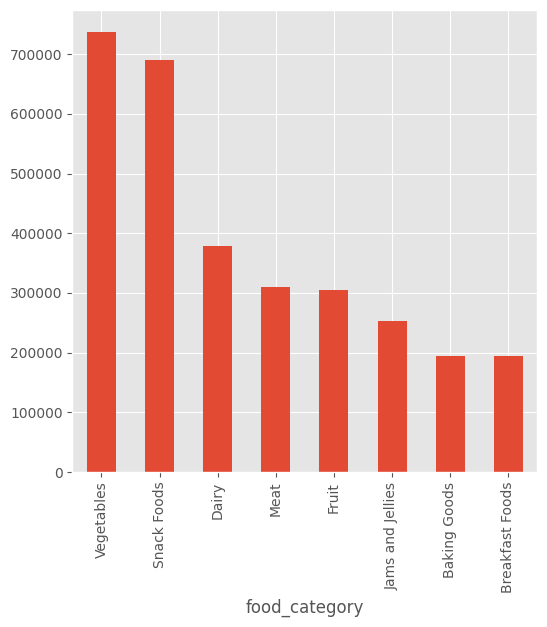

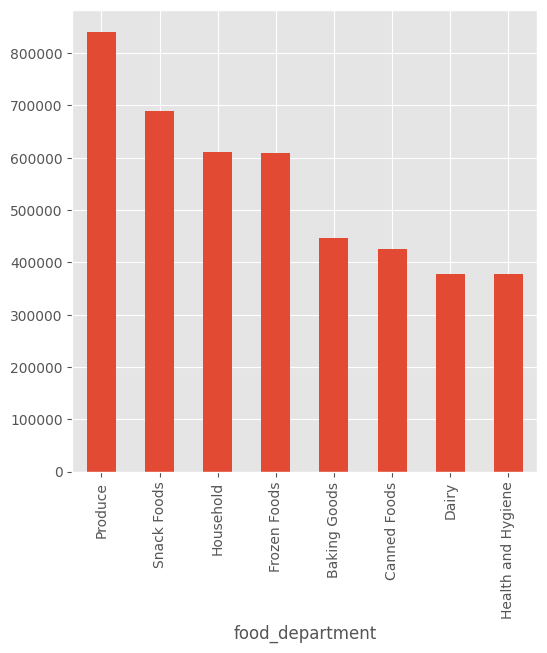

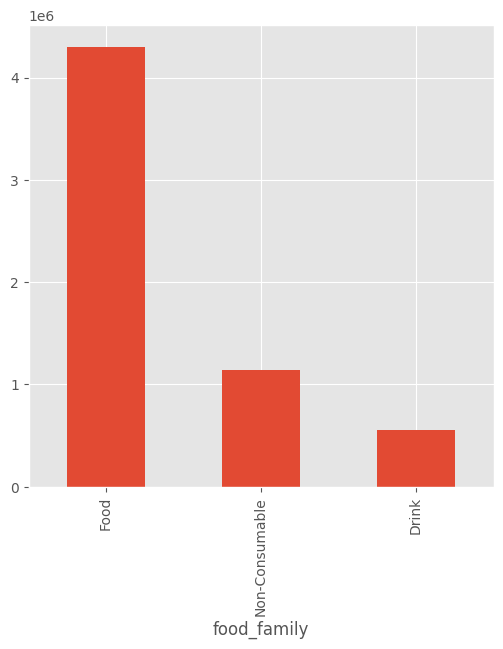

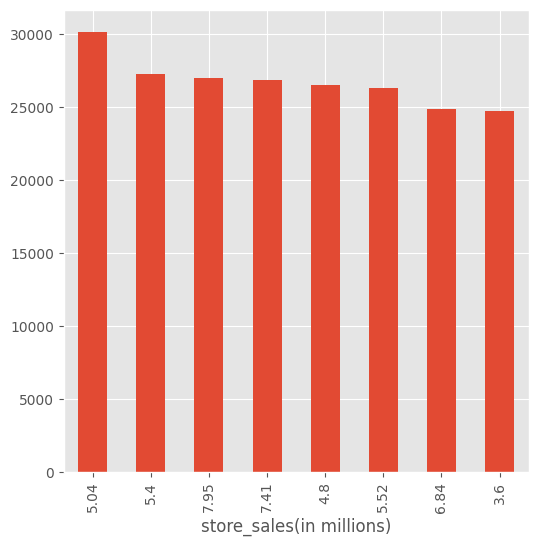

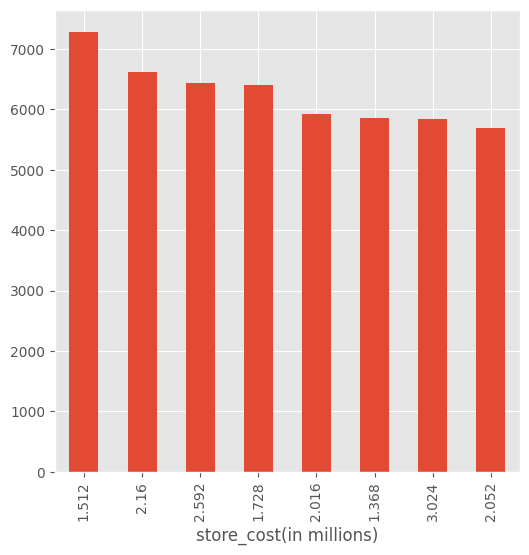

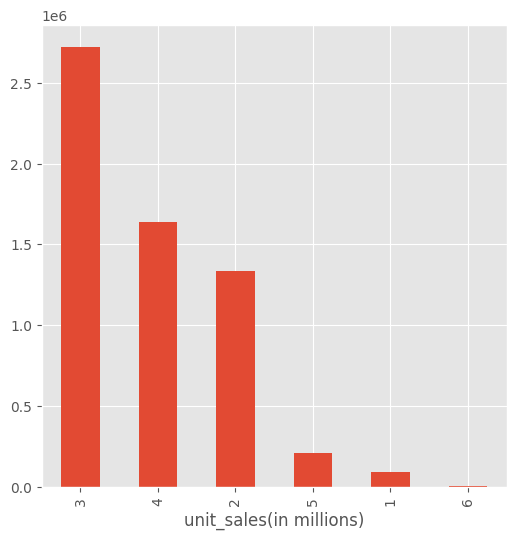

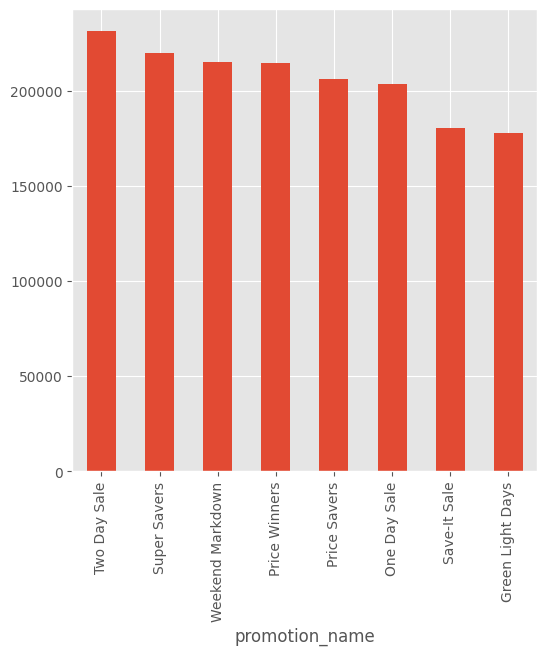

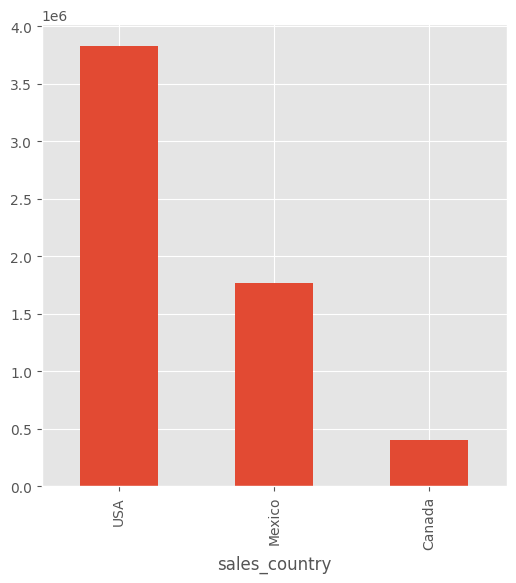

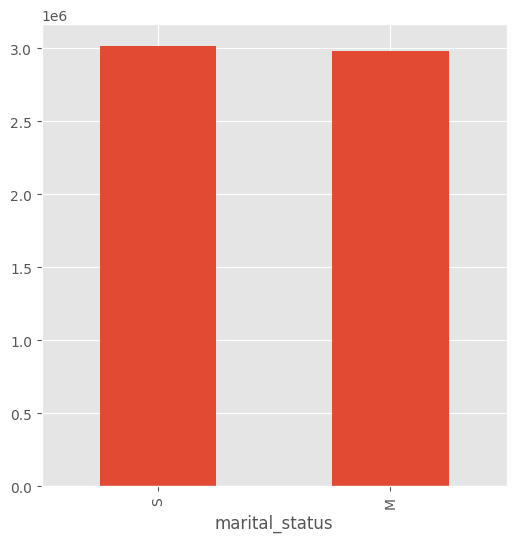

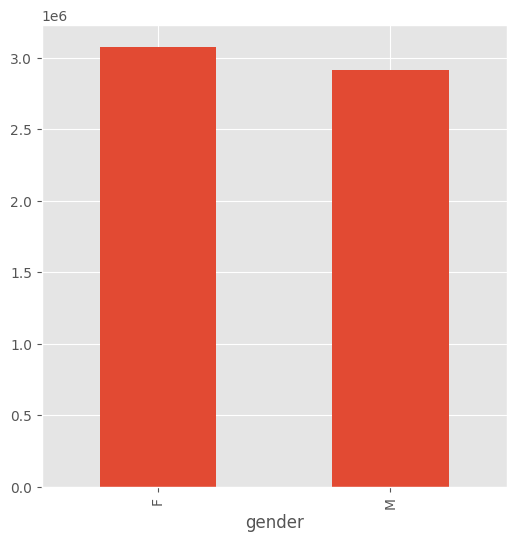

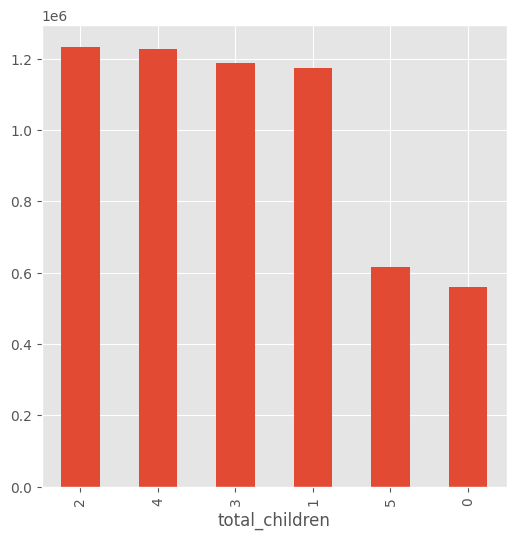

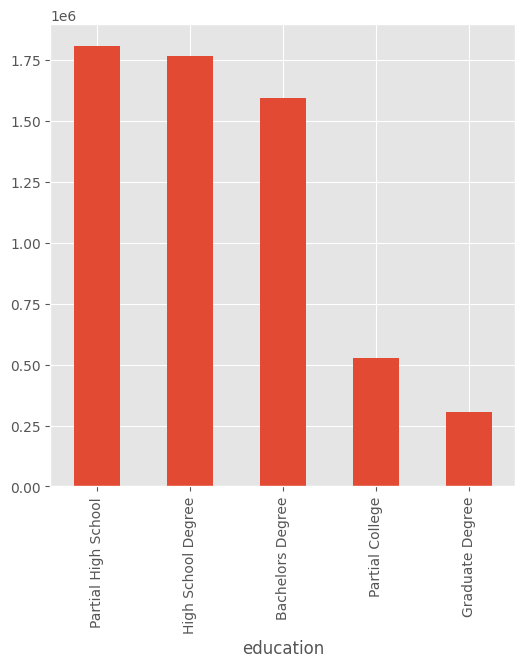

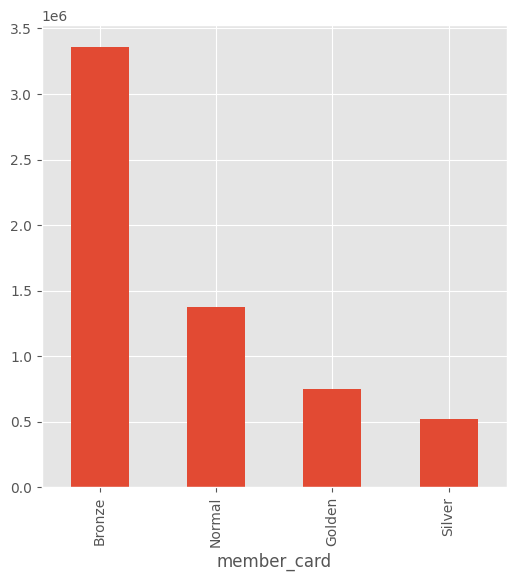

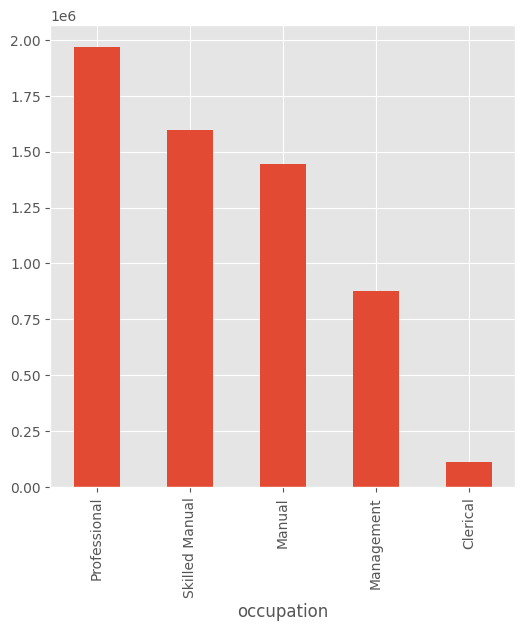

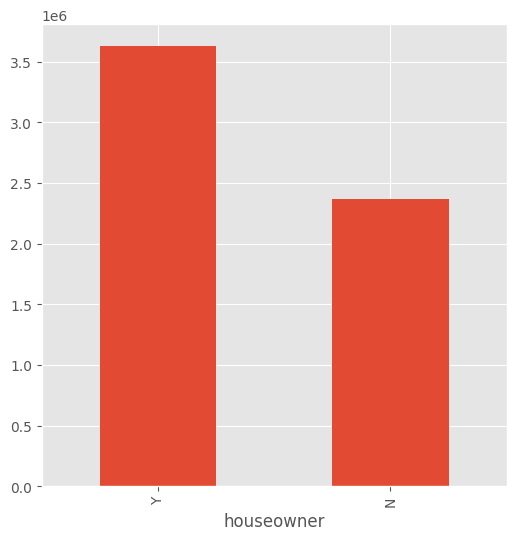

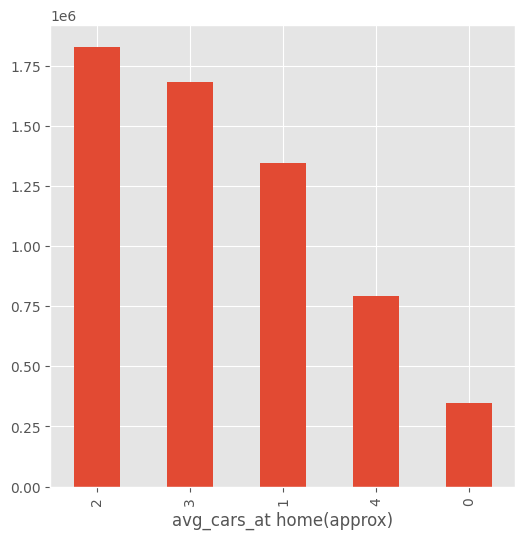

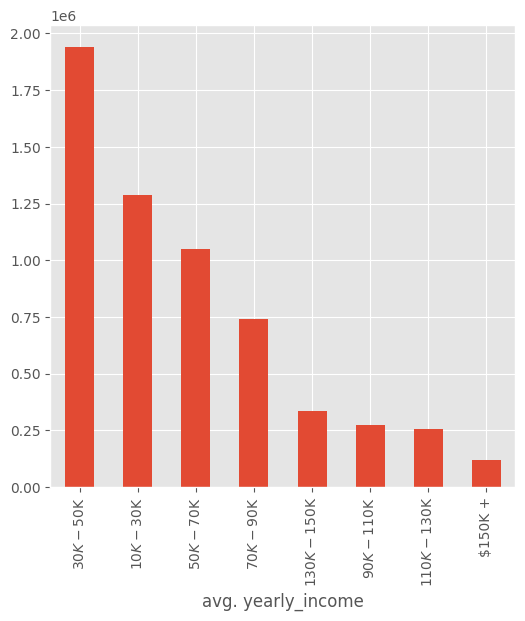

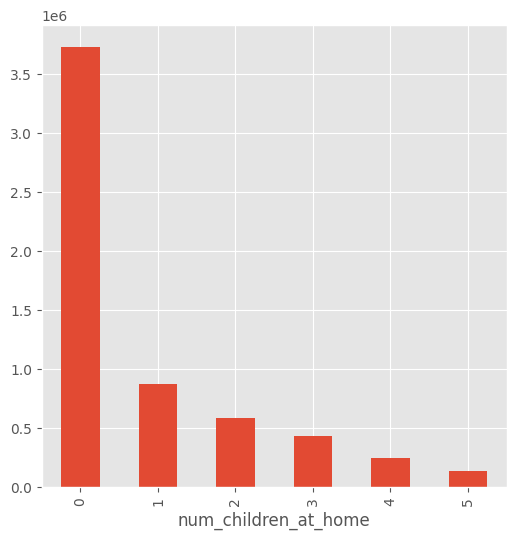

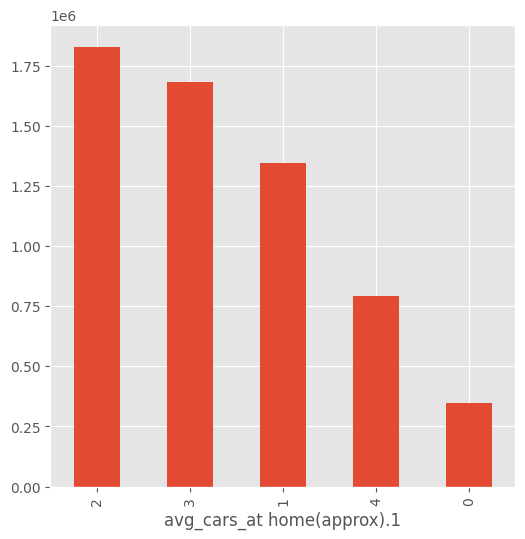

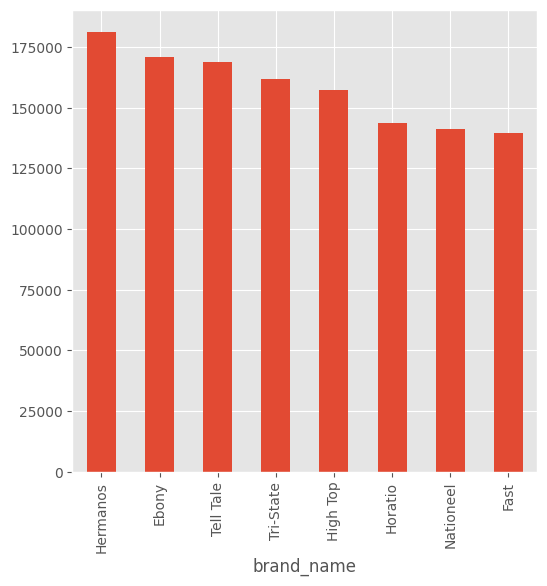

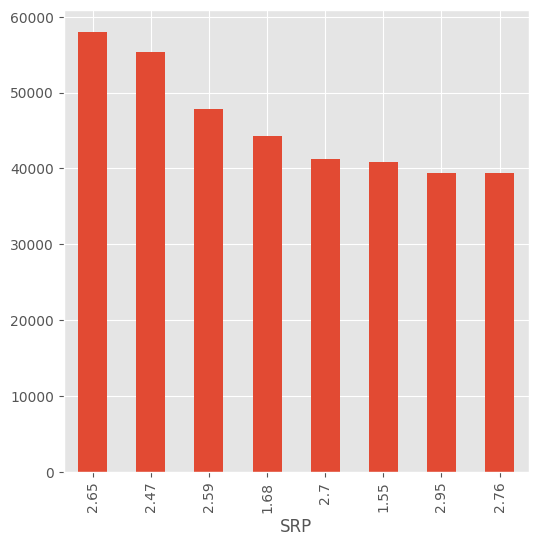

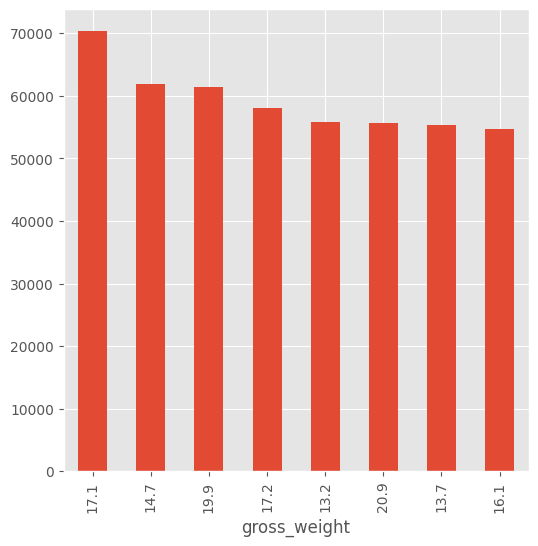

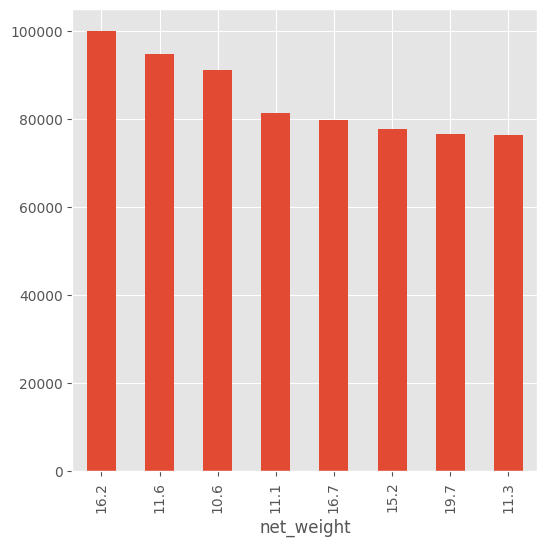

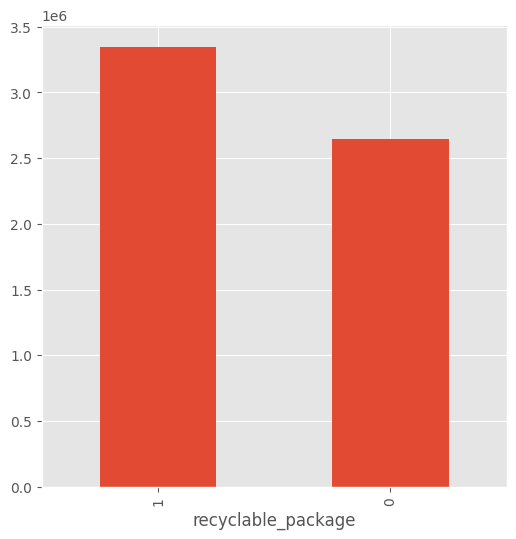

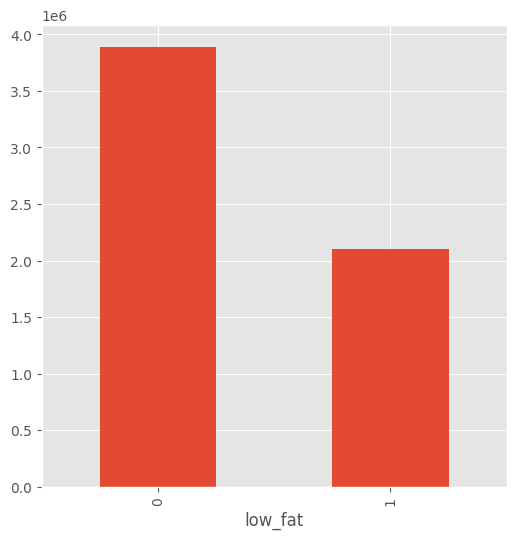

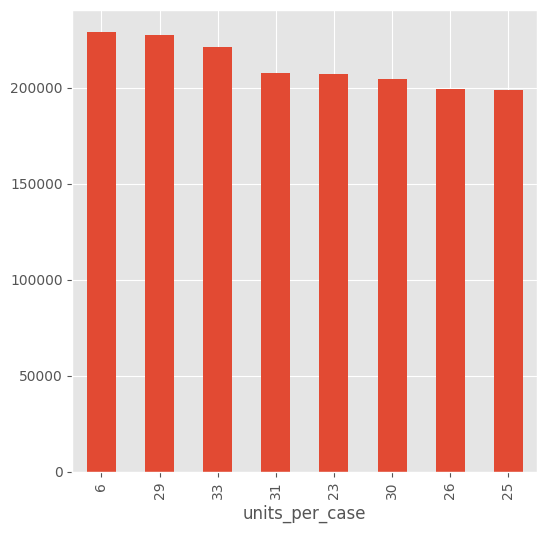

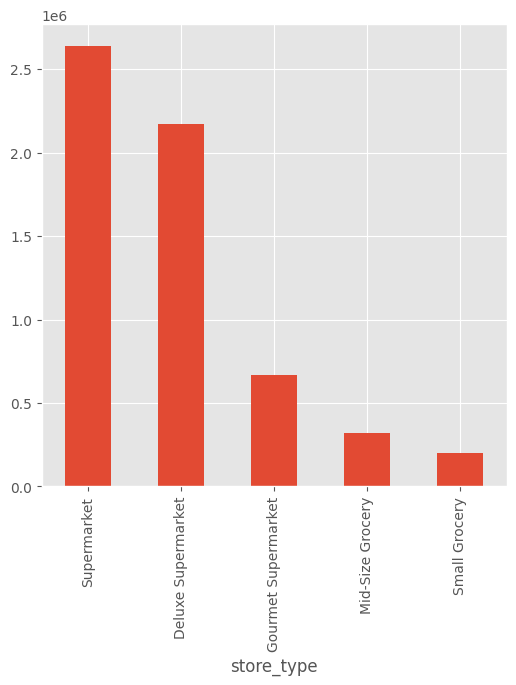

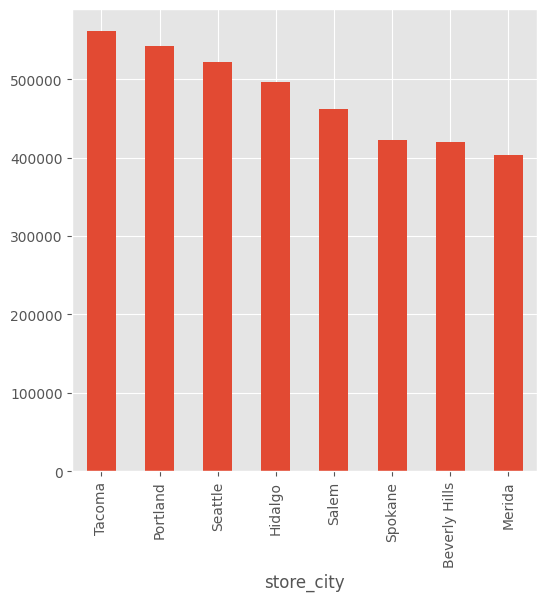

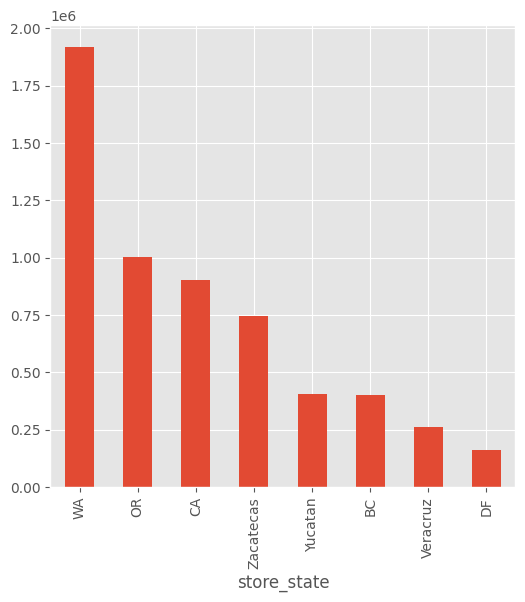

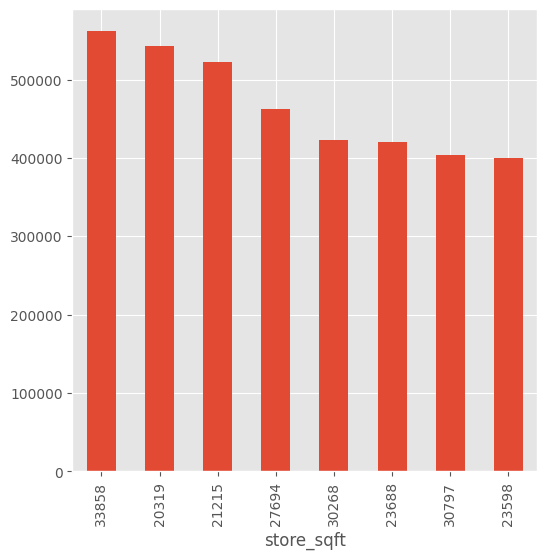

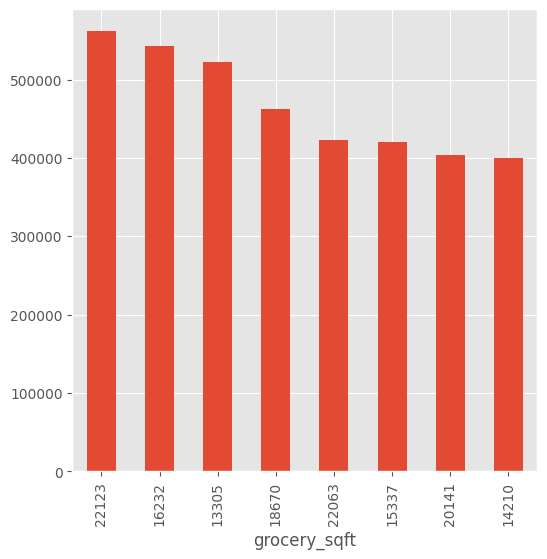

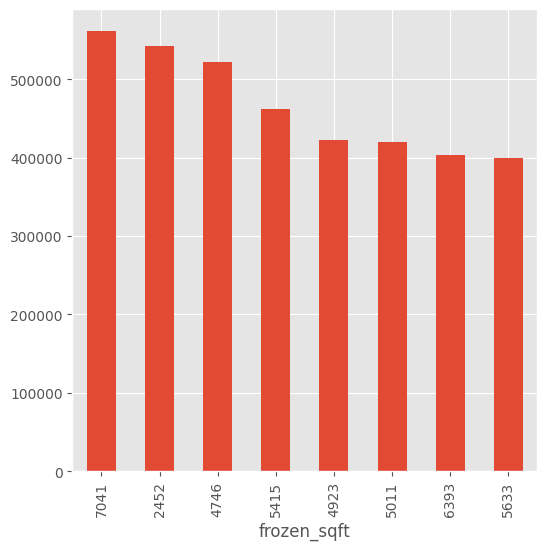

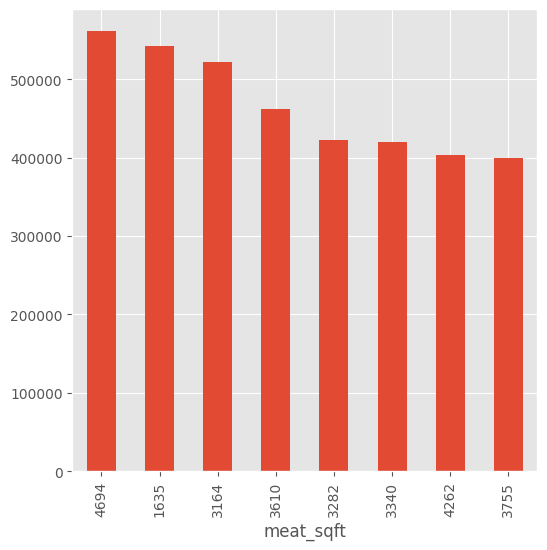

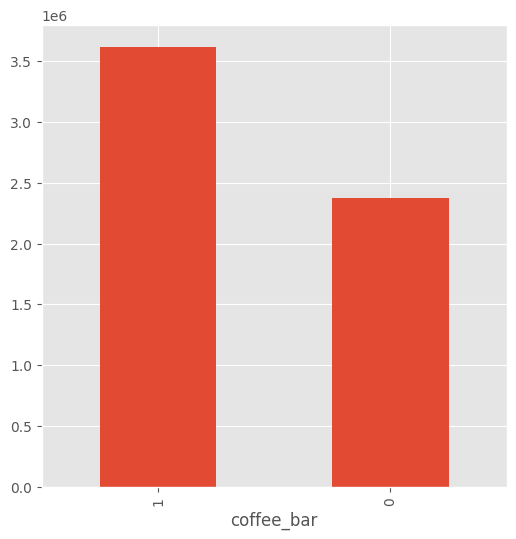

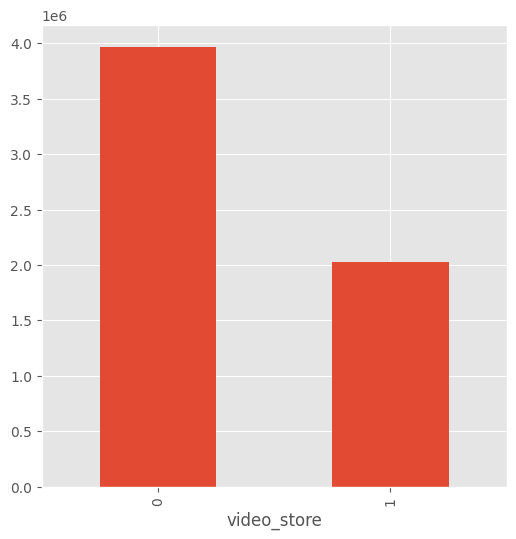

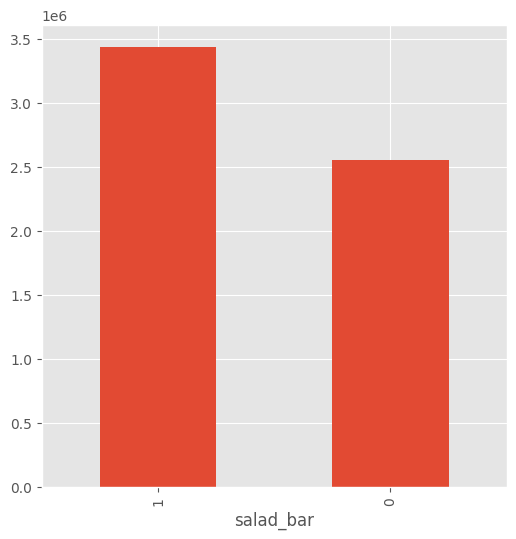

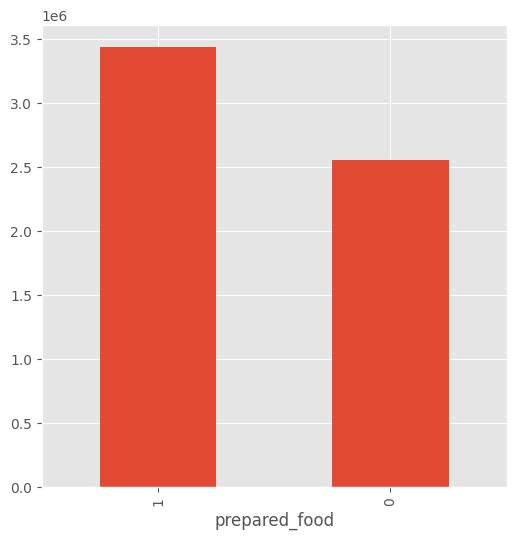

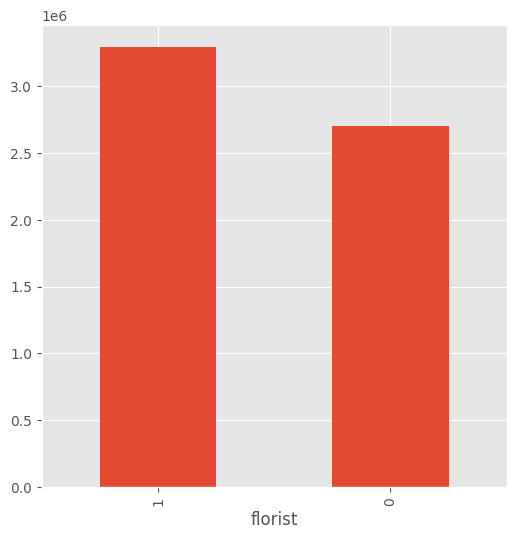

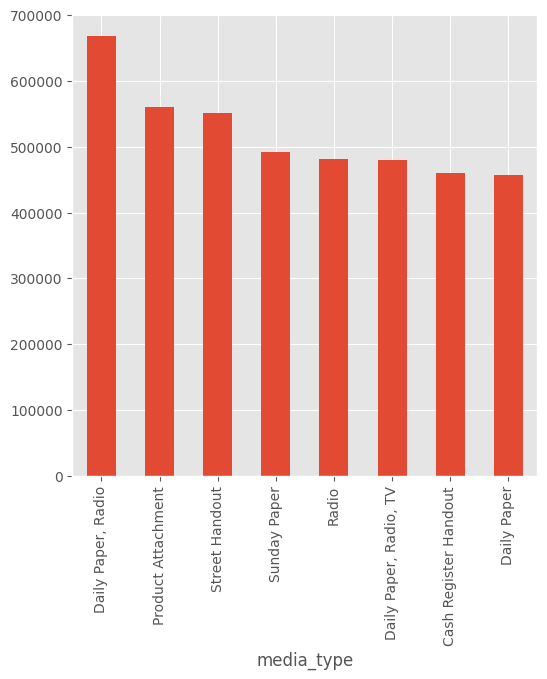

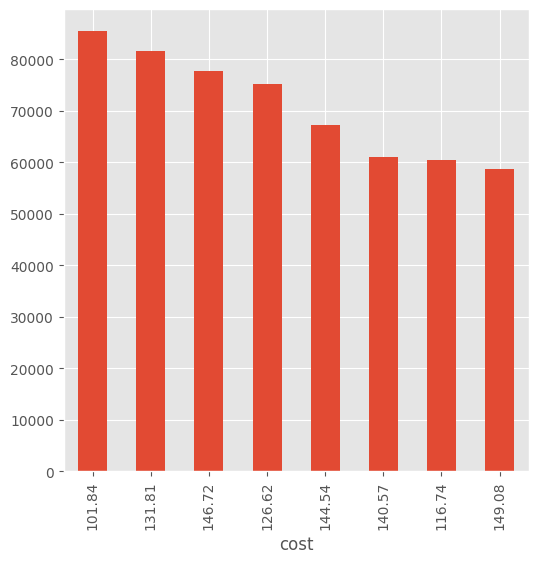

In [38]:
for i in data.columns:
    plt.figure(figsize=(6,6))
    plt.style.use("ggplot")
    data.groupby(i)['cost'].sum().sort_values(ascending=False).head(8).plot(kind = "bar")
    plt.show()
    

In [39]:
data['cost'].describe()


count    60428.000000
mean        99.262366
std         30.011257
min         50.790000
25%         69.650000
50%         98.520000
75%        126.620000
max        149.750000
Name: cost, dtype: float64

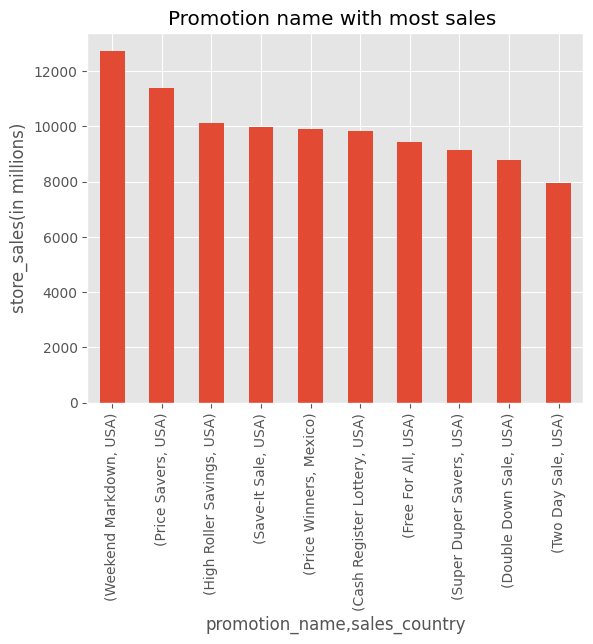

In [40]:
data.groupby(['promotion_name' , 'sales_country'])['store_sales(in millions)'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.ylabel('store_sales(in millions)')
plt.title('Promotion name with most sales ')
plt.show()

In [41]:
data['store_profit'] = data['store_sales(in millions)']/data['store_cost(in millions)']

In [42]:
data


,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost,store_profit
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4,Bag Stuffers,USA,M,F,1,Partial High School,Normal,Skilled Manual,Y,1,$10K - $30K,1,1,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",126.62,2.702703
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3,Cash Register Lottery,USA,M,M,0,Bachelors Degree,Silver,Professional,Y,4,$50K - $70K,0,4,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",59.86,2.127660
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2,High Roller Savings,USA,S,F,4,Partial High School,Normal,Manual,N,1,$10K - $30K,0,1,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",84.16,2.702703
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2,Cash Register Lottery,USA,M,F,2,High School Degree,Bronze,Manual,Y,2,$30K - $50K,2,2,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,In-Store Coupon,95.78,3.125000
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3,Double Down Sale,USA,M,M,0,Partial High School,Bronze,Skilled Manual,N,2,$30K - $50K,0,2,Golden,1.36,7.12,5.11,0,1,29,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,Radio,50.79,2.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1,You Save Days,USA,M,F,1,Partial High School,Normal,Skilled Manual,Y,1,$10K - $30K,1,1,ADJ,2.76,19.60,18.60,1,0,26,Small Grocery,San Francisco,CA,22478,15321,4294,2863,1,0,0,0,0,In-Store Coupon,95.25,2.083333
60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1,Price Cutters,USA,S,F,2,High School Degree,Bronze,Skilled Manual,N,2,$30K - $50K,0,2,Symphony,1.60,17.40,15.30,1,0,36,Small Grocery,San Francisco,CA,22478,15321,4294,2863,1,0,0,0,0,Sunday Paper,69.42,3.225806
60425,Specialty,Carousel,Non-Consumable,5.52,2.5392,2,Weekend Markdown,USA,M,M,1,High School Degree,Bronze,Manual,Y,3,$30K - $50K,0,3,ADJ,2.76,19.60,18.60,1,0,26,Small Grocery,San Francisco,CA,22478,15321,4294,2863,1,0,0,0,0,"Sunday Paper, Radio, TV",67.51,2.173913
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3,Sales Days,Canada,S,M,2,Bachelors Degree,Bronze,Professional,N,4,$70K - $90K,0,4,ADJ,2.76,19.60,18.60,1,0,26,Mid-Size Grocery,Victoria,BC,34452,27463,4193,2795,1,0,0,0,1,Sunday Paper,132.88,3.225806


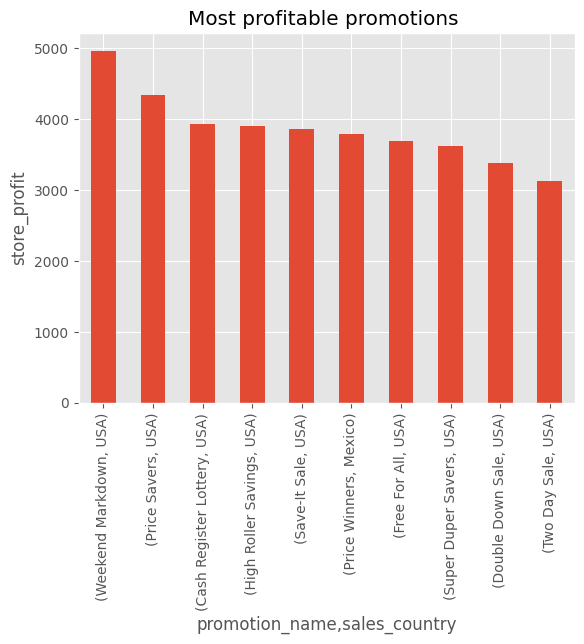

In [44]:
data.groupby(['promotion_name' , 'sales_country'])['store_profit'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.ylabel('store_profit')
plt.title('Most profitable promotions ')
plt.show()

C:\Users\abhay\AppData\Local\Temp\ipykernel_16248\2361578558.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr() , annot = True)


[]

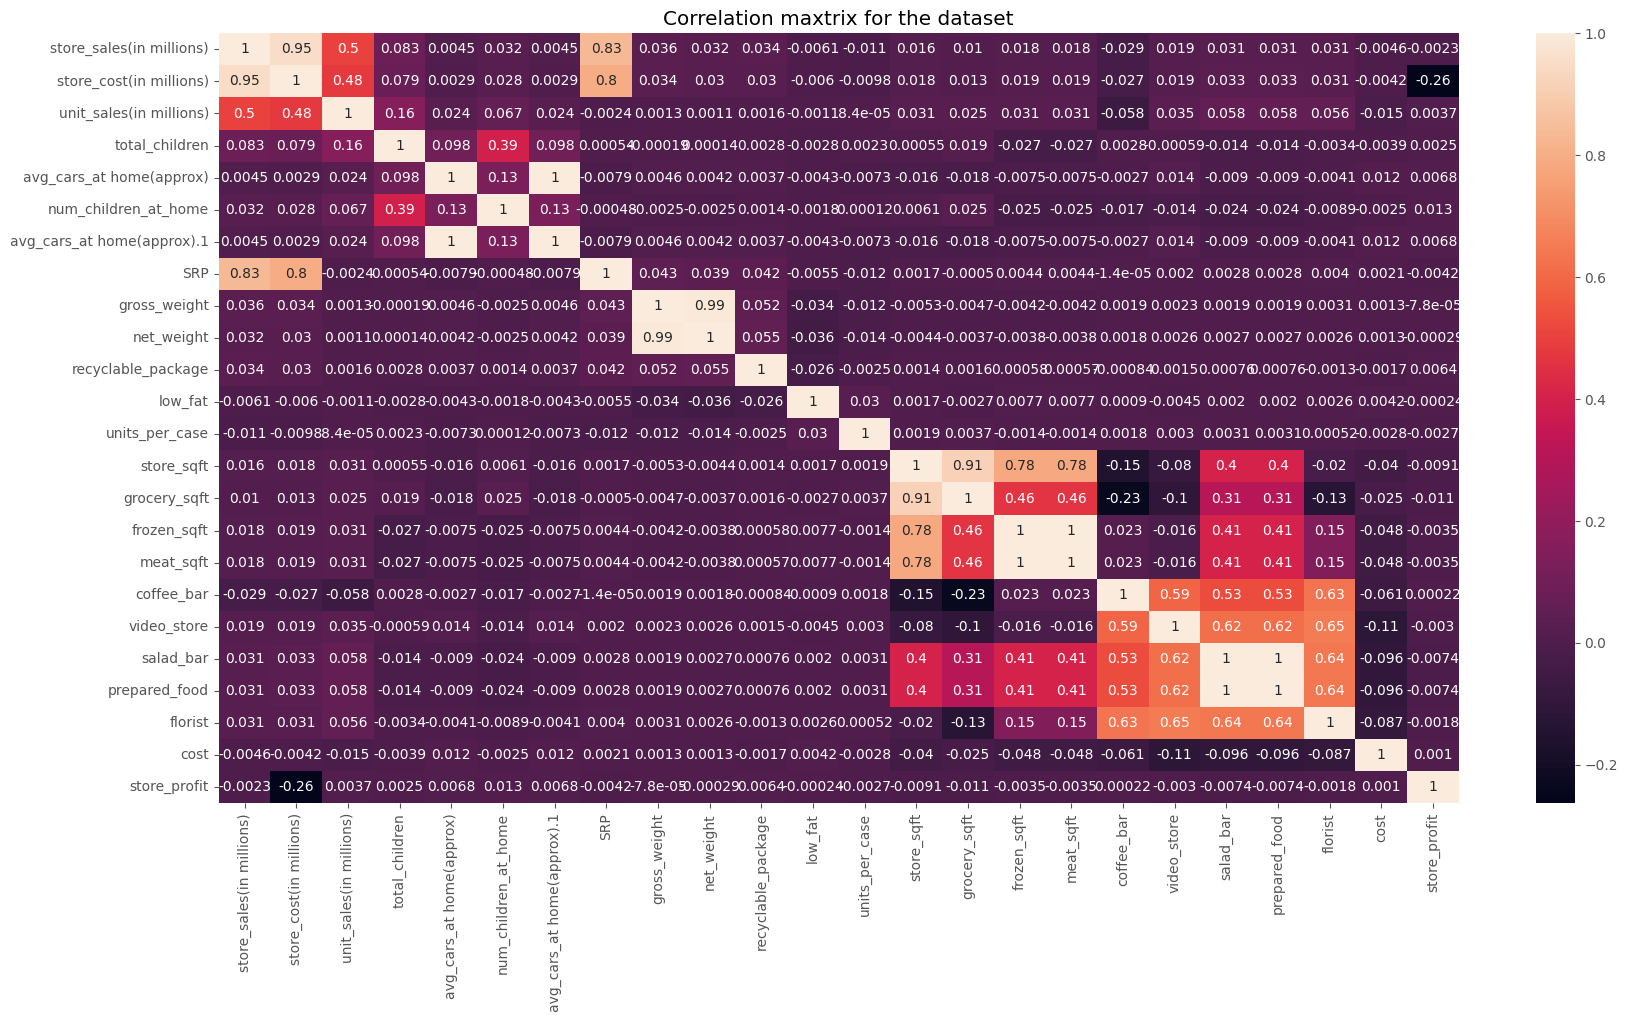

In [45]:
plt.figure(figsize = (20 , 10))
sns.heatmap(data.corr() , annot = True)
plt.title('Correlation maxtrix for the dataset')
plt.plot()

In [46]:
data['total_children'] = data['total_children'].astype(int)
data['avg_cars_at home(approx)'] = data['avg_cars_at home(approx)'].astype(int) 
data['num_children_at_home'] = data['num_children_at_home'].astype(int)
#data['avg_cars_at home(approx)'] = data['avg_cars_at home(approx)'].astype(int)
data.drop(['avg_cars_at home(approx).1'] , axis = 1 , inplace = True)

In [47]:
(data["total_children"].dtype)


dtype('int32')

In [48]:


import statsmodels.api as sm
from statsmodels.formula.api import ols


In [58]:
data.columns

array(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner',
       'avg_cars_at home(approx)', 'avg. yearly_income',
       'num_children_at_home', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft',
       'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
       'video_store', 'salad_bar', 'prepared_food', 'florist',
       'media_type', 'cost', 'store_profit'], dtype=object)

In [62]:
## Dropping Unwanted features 

drp_features = data[['food_category', 'food_department', 'food_family',
       'store_cost(in millions)',
       'unit_sales(in millions)',
       'marital_status', 'education',
       'member_card', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home', 'brand_name', 'SRP',
       'gross_weight', 'recyclable_package', 'low_fat',
       'units_per_case',
       'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
       'video_store', 'salad_bar', 'florist']]
drp_features.shape


(60428, 25)

In [98]:
data_1 = data.drop(['food_category', 'food_department', 'food_family',
       'store_cost(in millions)',
       'unit_sales(in millions)',
       'marital_status', 'education',
       'member_card', 'houseowner', 'avg_cars_at home(approx)',
      'avg. yearly_income', 'num_children_at_home', 'brand_name', 'SRP',
       'gross_weight', 'recyclable_package', 'low_fat',
       'units_per_case',
       'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
       'video_store', 'salad_bar', 'florist'] , axis = 1 
        )


In [65]:
data_1

,store_sales(in millions),promotion_name,sales_country,gender,total_children,occupation,net_weight,store_type,store_city,store_state,store_sqft,prepared_food,media_type,cost,store_profit
0,7.36,Bag Stuffers,USA,F,1,Skilled Manual,17.70,Deluxe Supermarket,Salem,OR,27694,1,"Daily Paper, Radio",126.62,2.702703
1,5.52,Cash Register Lottery,USA,M,0,Professional,17.70,Deluxe Supermarket,Salem,OR,27694,1,"Daily Paper, Radio",59.86,2.127660
2,3.68,High Roller Savings,USA,F,4,Manual,17.70,Deluxe Supermarket,Salem,OR,27694,1,"Daily Paper, Radio",84.16,2.702703
3,3.68,Cash Register Lottery,USA,F,2,Manual,17.70,Deluxe Supermarket,Salem,OR,27694,1,In-Store Coupon,95.78,3.125000
4,4.08,Double Down Sale,USA,M,0,Skilled Manual,5.11,Deluxe Supermarket,Salem,OR,27694,1,Radio,50.79,2.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,2.76,You Save Days,USA,F,1,Skilled Manual,18.60,Small Grocery,San Francisco,CA,22478,0,In-Store Coupon,95.25,2.083333
60424,1.60,Price Cutters,USA,F,2,Skilled Manual,15.30,Small Grocery,San Francisco,CA,22478,0,Sunday Paper,69.42,3.225806
60425,5.52,Weekend Markdown,USA,M,1,Manual,18.60,Small Grocery,San Francisco,CA,22478,0,"Sunday Paper, Radio, TV",67.51,2.173913
60426,8.28,Sales Days,Canada,M,2,Professional,18.60,Mid-Size Grocery,Victoria,BC,34452,0,Sunday Paper,132.88,3.225806


C:\Users\abhay\AppData\Local\Temp\ipykernel_16248\4181438768.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_1.corr() , annot = True)


[]

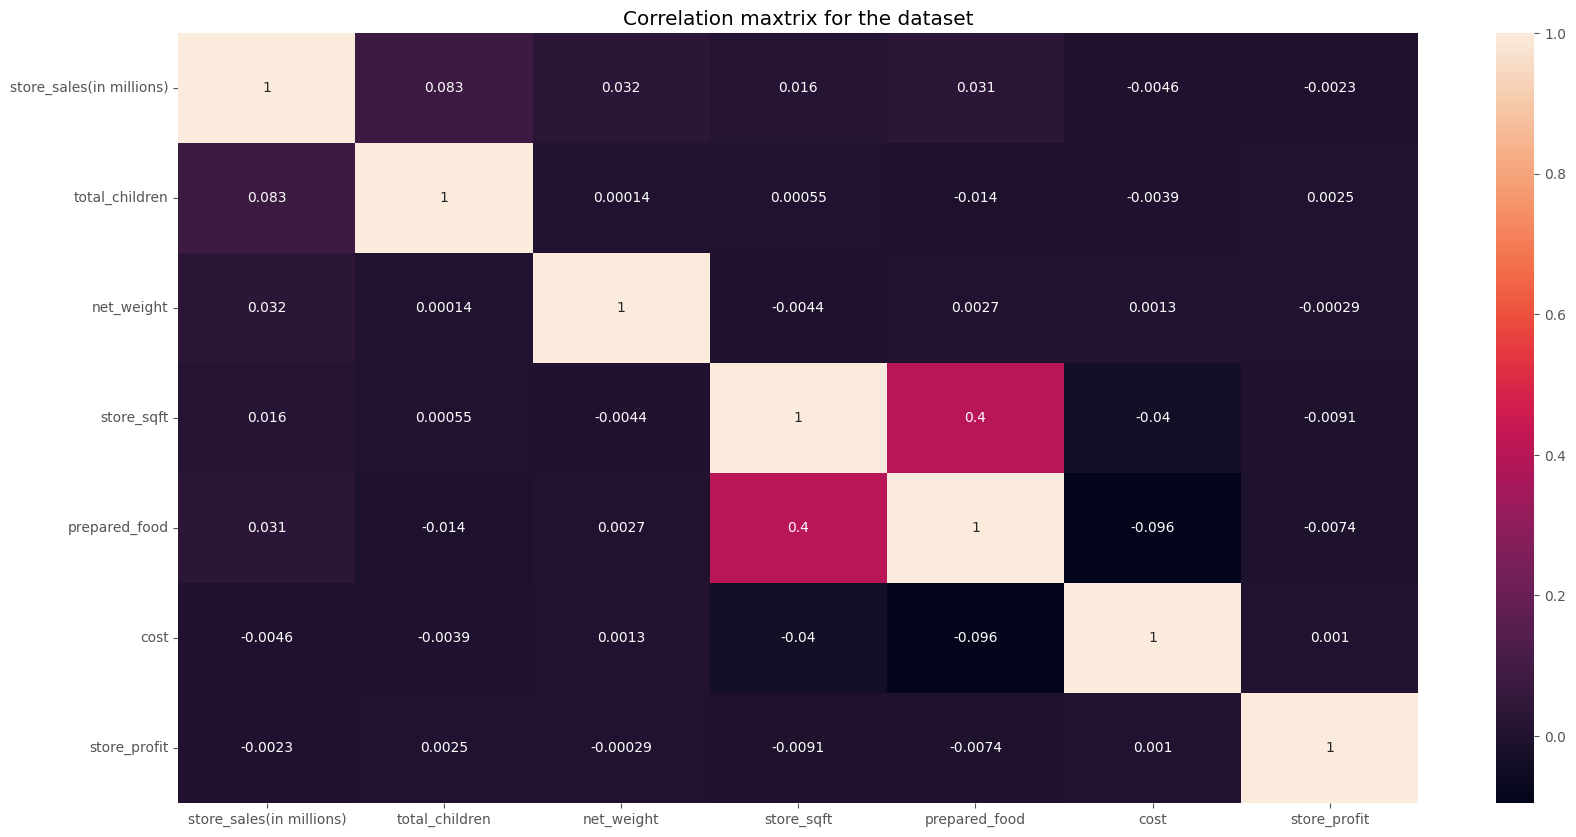

In [66]:
## Checking For MUlticolinearity

plt.figure(figsize = (20 , 10))
sns.heatmap(data_1.corr() , annot = True)
plt.title('Correlation maxtrix for the dataset')
plt.plot()

In [67]:
data_1.columns

Index(['store_sales(in millions)', 'promotion_name', 'sales_country', 'gender',
       'total_children', 'occupation', 'net_weight', 'store_type',
       'store_city', 'store_state', 'store_sqft', 'prepared_food',
       'media_type', 'cost', 'store_profit'],
      dtype='object')

In [69]:
## Now for Categorical Variables 
for i in data_1.columns[data_1.dtypes == 'object']:
    print('The category count for {}'.format(i))
    print(data.value_counts(i))
    print('The category shape is {}'.format(data.value_counts(i).shape))
    print('--------------------------')
    print('                          ')

The category count for promotion_name
promotion_name
Weekend Markdown           2330
Two Day Sale               2321
Price Savers               2279
Price Winners              2108
Save-It Sale               2001
Super Duper Savers         1986
Super Savers               1930
One Day Sale               1843
Double Down Sale           1755
High Roller Savings        1741
Green Light Days           1702
Shelf Clearing Days        1690
Price Slashers             1647
Free For All               1621
Cash Register Lottery      1555
Go For It                  1521
Two for One                1493
Money Savers               1489
Big Time Discounts         1480
Price Destroyers           1374
Saving Days                1353
Dollar Cutters             1326
Unbeatable Price Savers    1217
Sales Galore               1212
Big Promo                  1172
Dimes Off                  1150
Sales Days                 1107
Price Cutters              1099
You Save Days              1075
Savings Galore     

In [99]:
## promotion_name has more than 10 categories so minimizing the categories using others
print(data_1['promotion_name'].value_counts().shape)
Count_promotion = data_1['promotion_name'].value_counts()
low_promotion = 1750
other_promotion = Count_promotion[Count_promotion < low_promotion].index
Count_promotion[Count_promotion < low_promotion].index.shape #40
df_promotions = pd.get_dummies(data_1['promotion_name'].replace(other_promotion , 'other_promotions') ,drop_first = True )

(49,)


In [100]:
print(data_1['store_city'].value_counts().shape)
Count_store_city = data_1['store_city'].value_counts()
low_store_city = 3500
other_store_city = Count_store_city[Count_store_city < low_store_city].index
Count_store_city[Count_store_city < low_store_city].index.shape 
df_store_city = pd.get_dummies(data_1['store_city'].replace(other_store_city , 'other_store_citys') ,drop_first = True )


(19,)


In [101]:
print(data_1['media_type'].value_counts().shape)
Count_media_type = data_1['media_type'].value_counts()
low_media_type = 4049
other_media_type = Count_media_type[Count_media_type < low_media_type].index
Count_media_type[Count_media_type < low_media_type].index.shape 
df_media_type = pd.get_dummies(data_1['media_type'].replace(other_media_type , 'Count_media_types') ,drop_first = True )

(13,)


In [103]:
data_2 = data_1
data_2 = pd.concat([data_2,df_promotions , df_store_city] , axis =  1 , join = 'inner')
data_2

,store_sales(in millions),promotion_name,sales_country,gender,total_children,occupation,net_weight,store_type,store_city,store_state,store_sqft,prepared_food,media_type,cost,store_profit,One Day Sale,Price Savers,Price Winners,Save-It Sale,Super Duper Savers,Super Savers,Two Day Sale,Weekend Markdown,other_promotions,Hidalgo,Los Angeles,Merida,Portland,Salem,Seattle,Spokane,Tacoma,other_store_citys
0,7.36,Bag Stuffers,USA,F,1,Skilled Manual,17.70,Deluxe Supermarket,Salem,OR,27694,1,"Daily Paper, Radio",126.62,2.702703,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,5.52,Cash Register Lottery,USA,M,0,Professional,17.70,Deluxe Supermarket,Salem,OR,27694,1,"Daily Paper, Radio",59.86,2.127660,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,3.68,High Roller Savings,USA,F,4,Manual,17.70,Deluxe Supermarket,Salem,OR,27694,1,"Daily Paper, Radio",84.16,2.702703,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,3.68,Cash Register Lottery,USA,F,2,Manual,17.70,Deluxe Supermarket,Salem,OR,27694,1,In-Store Coupon,95.78,3.125000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,4.08,Double Down Sale,USA,M,0,Skilled Manual,5.11,Deluxe Supermarket,Salem,OR,27694,1,Radio,50.79,2.857143,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,2.76,You Save Days,USA,F,1,Skilled Manual,18.60,Small Grocery,San Francisco,CA,22478,0,In-Store Coupon,95.25,2.083333,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
60424,1.60,Price Cutters,USA,F,2,Skilled Manual,15.30,Small Grocery,San Francisco,CA,22478,0,Sunday Paper,69.42,3.225806,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
60425,5.52,Weekend Markdown,USA,M,1,Manual,18.60,Small Grocery,San Francisco,CA,22478,0,"Sunday Paper, Radio, TV",67.51,2.173913,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
60426,8.28,Sales Days,Canada,M,2,Professional,18.60,Mid-Size Grocery,Victoria,BC,34452,0,Sunday Paper,132.88,3.225806,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [104]:
## Dropping columns with more than 10 categories
#media_type , store_city ,promotion_name
data_1.drop(['media_type' , 'store_city','promotion_name'] ,axis = 1, inplace = True)

In [105]:
data_1.shape

(60428, 12)

In [106]:
##Concat the dataframes together
data_1 = pd.concat([data_1,df_promotions , df_store_city , df_media_type] , axis =  1 , join = 'inner')

In [107]:
##Spliting the data into Training and Test sets
X = data_1.drop(['cost'] , axis =  1)
Y = data_1.cost

In [108]:
X.shape

(60428, 38)

In [109]:
Y.shape

(60428,)

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train,X_test , y_train , y_test = train_test_split(X , y , test_size = .2 ,random_state = 1)

In [112]:
X_train.shape , X_test.shape

((48342, 38), (12086, 38))

In [113]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = 'first' , sparse = False)

In [114]:
from sklearn.compose import ColumnTransformer

In [115]:
X_train.head()

,store_sales(in millions),sales_country,gender,total_children,occupation,net_weight,store_type,store_state,store_sqft,prepared_food,store_profit,One Day Sale,Price Savers,Price Winners,Save-It Sale,Super Duper Savers,Super Savers,Two Day Sale,Weekend Markdown,other_promotions,Hidalgo,Los Angeles,Merida,Portland,Salem,Seattle,Spokane,Tacoma,other_store_citys,Daily Paper,"Daily Paper, Radio","Daily Paper, Radio, TV",In-Store Coupon,Product Attachment,Radio,Street Handout,Sunday Paper,"Sunday Paper, Radio"
19714,3.90,Canada,F,0,Management,8.80,Deluxe Supermarket,BC,23112,1,2.380952,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
54187,4.98,USA,M,2,Skilled Manual,7.84,Supermarket,WA,39696,1,2.941176,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10944,9.87,USA,F,4,Professional,6.85,Gourmet Supermarket,CA,23688,1,2.083333,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
55153,9.24,USA,M,2,Management,5.03,Gourmet Supermarket,CA,23688,1,3.225806,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33218,8.65,Mexico,F,5,Manual,10.80,Supermarket,Guerrero,23593,0,2.173913,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [116]:
transformer = ColumnTransformer(transformers = [
    ('tnf' , OneHotEncoder(drop = 'first' , sparse = False) , [1,2,4,6,7])
],remainder = 'passthrough'
)

In [117]:
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.fit_transform(X_test)

C:\Users\abhay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\abhay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_trans_scaled = scaler.fit_transform(X_train_trans)
X_test_trans_scaled = scaler.transform(X_test_trans)

In [119]:
X_train_trans_scaled.shape , X_test_trans_scaled.shape

((48342, 53), (12086, 53))

In [120]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [121]:
lr.fit(X_train_trans_scaled , y_train)

LinearRegression()

In [122]:
y_pred = lr.predict(X_test_trans_scaled)

In [123]:
lr.coef_

array([-4.41176059e+11,  1.04357245e+13, -2.84851074e-01, -3.11523438e-01,
       -4.53216553e-01, -4.50897217e-01, -3.80325317e-02, -1.15993412e+12,
        4.67252874e+12, -4.09790471e+11, -1.20874765e+13,  9.15405915e+11,
        1.45960459e+11,  7.39789579e+12,  2.16433796e+12, -4.82771143e+12,
        5.20371507e+12,  1.20509345e+12,  4.54469372e+12,  1.52214065e+12,
        7.54413605e-02,  6.18934631e-02,  4.79660034e-02, -3.09127579e+01,
        1.08681877e+13,  7.72476196e-02,  5.76186752e+00,  5.61828613e-01,
        3.60749912e+00,  2.34839439e+00,  6.75796509e-01,  4.02892494e+00,
        3.02164078e+00,  6.97265625e-01,  8.61914062e+00,  4.54371218e+12,
        1.05929467e+13,  1.11058374e+12,  1.62646792e+13,  3.28656965e+12,
        1.18606941e+13,  1.11130619e+13, -1.10075941e+12,  9.30471351e+12,
       -3.18164062e+00,  6.35742188e-01, -3.42333984e+00,  3.65600586e-01,
        1.40917969e+00, -4.98046875e-01,  1.85546875e+00,  9.22851562e-01,
        3.29003906e+00])

In [126]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

0.13111757788671974

In [127]:

n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points
random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [128]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rfr,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=0, random_state=35, n_jobs = -1)

In [129]:
rf_random.fit(X_train_trans_scaled, y_train)
rf_predict = rf_random.predict(X_test_trans_scaled)
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': True}  



In [130]:
r2_score(y_test , rf_predict)

0.706511574441548